# 신생아 이름 분석

1. 시대별로 특정 이름이 차지하는 비율을 구해 얼마나흔한 이름인지 알아보기
2. 이름의 상대 순위 알아보기
3. 각 연도별로 가장 인기있는 이름 ,가장 많이 증가하거나 감소한 이름 알아보기
4. 모음, 자음, 길이, 전체 다양성, 철자 변화, 첫 글자와 마지막 글자 등 이름 유행 분석하기
5. 성서에 등장하는 이름, 유명인, 인구통계학적 변화 등 외부 자료를 통한 유행 분석

In [3]:
import pandas as pd

In [4]:
import numpy as np
import os

In [13]:
os.chdir('C:/Users/User/allcode/rpythoncode/examples/babynames')

In [14]:
names1880 = pd.read_csv('yob1880.txt', header = None, names = ['name', 'sex', 'birth'])

In [15]:
names1880[:10]

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [16]:
names1880.groupby('sex').birth.sum()

sex
F     90993
M    110493
Name: birth, dtype: int64

자료가 연도별파일로 나누어져 있으니 모든 데이터를 데이터프레임으로 모으자

In [17]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'birth']
for year in years:
    path = 'yob%d.txt' %year
    frame = pd.read_csv(path, header = None, names = columns)
    frame['year'] = year
    pieces.append(frame)

In [18]:
names = pd.concat(pieces, ignore_index = True)

In [19]:
names[:5]

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [20]:
total_birth = names.pivot_table('birth', index = 'year', columns = 'sex', aggfunc = 'sum')

In [21]:
total_birth[:10]

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445
1885,133056,107802
1886,144538,110785
1887,145983,101412
1888,178631,120857


<AxesSubplot:title={'center':'성별과 연도에 따른 출생수'}, xlabel='year'>

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current

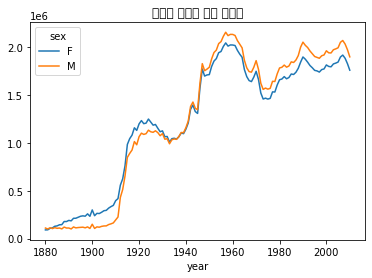

In [22]:
total_birth.plot(title = '성별과 연도에 따른 출생수')

In [23]:
import matplotlib.pyplot as mp

각 이름이 전체 출생 수에서 차지하는 비율을 계산하자

In [24]:
name_index = names['name'].unique()

In [25]:
name_index

array(['Mary', 'Anna', 'Emma', ..., 'Zymaire', 'Zyonne', 'Zzyzx'],
      dtype=object)

In [26]:
nbcount = names.groupby('name').birth.sum()

In [27]:
result = []
def add_prop(group):
    for x in group.item:
        prop = x / names.birth.sum() * 100
        result.append(prop)
        return result
        
    

In [28]:
nbcount

name
Aaban         20
Aabid          5
Aabriella      5
Aadam        133
Aadan         69
            ... 
Zyshonne     101
Zytavious     43
Zyvion         5
Zyyanna        6
Zzyzx          5
Name: birth, Length: 88496, dtype: int64

In [29]:
result

[]

In [30]:
add_prop(nbcount)

TypeError: 'method' object is not iterable

In [31]:
def add_prop(group):
    group['prop'] = group.birth / group.birth.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [32]:
names

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [33]:
names

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [34]:
names.prop.sum()

262.0000000000001

In [35]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

분석에 사용할 각 연도별/성별에 따른 선호하는 이름 1000개추출

In [36]:
def get_top1000(group):
    group

In [37]:
def get_top1000(group):
    return group.birth.sort_values(ascending = False)[:1000]
grouped = names.groupby(['year', 'sex'])

In [38]:
top1000 = grouped.apply(get_top1000)

In [39]:
top1000

year  sex         
1880  F    0          7065
           1          2604
           2          2003
           3          1939
           4          1746
                      ... 
2010  M    1677639     194
           1677640     194
           1677641     194
           1677642     194
           1677645     193
Name: birth, Length: 261877, dtype: int64

In [40]:
top1000.reset_index(inplace = True, drop = True)

In [41]:
top1000

0         7065
1         2604
2         2003
3         1939
4         1746
          ... 
261872     194
261873     194
261874     194
261875     194
261876     193
Name: birth, Length: 261877, dtype: int64

In [42]:
pd.DataFrame(names.groupby(['year', 'sex']))

,0,1
0,"(1880, F)",name sex birth year prop 0 ...
1,"(1880, M)",name sex birth year prop 942...
2,"(1881, F)",name sex birth year prop 200...
3,"(1881, M)",name sex birth year prop 2938 ...
4,"(1882, F)",name sex birth year prop 393...
...,...,...
257,"(2008, M)",name sex birth year prop ...
258,"(2009, F)",name sex birth year prop 1...
259,"(2009, M)",name sex birth year prop ...
260,"(2010, F)",name sex birth year prop ...


In [43]:
pieces = []
for year, sex in names.groupby(['year', 'sex']):
    pieces.append(sex.sort_values(by = 'birth', ascending = False)[:1000])
top1000 = pd.concat(pieces, ignore_index = True)

In [44]:
top1000

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


# 이름 유행 분석
## 상위 1000개의 데이터를 남자아이와 여자아이로 분리

In [45]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

# 연도와 이름에 대한 전체 출생 수를 피벗테이블로 만들자 

In [47]:
total_births = top1000.pivot_table('birth', index = 'year',
                                  columns = 'name', aggfunc = sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

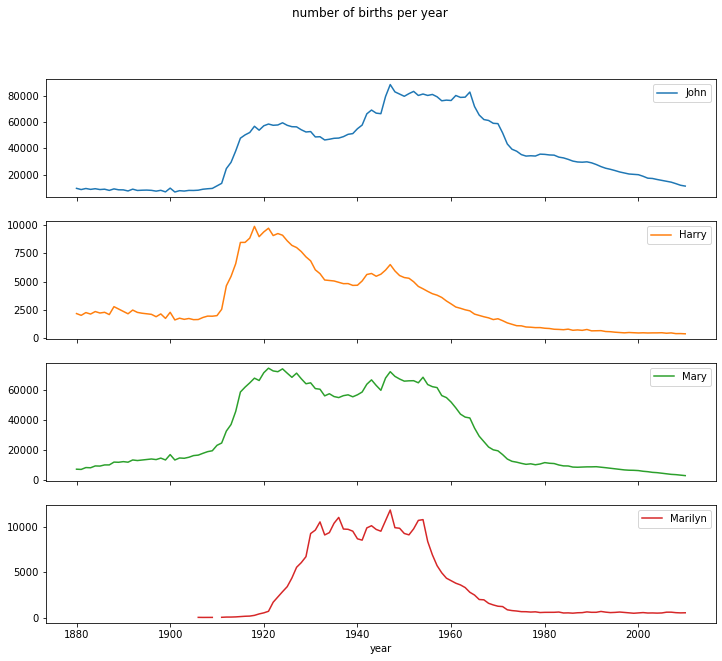

In [49]:
subset.plot(subplots = True, figsize = (12, 10), grid = False,
           title = 'number of births per year')

## 인기있는 이름 1000개가 전체 출생수에서 차지하는 비율을 연도별/성별 그래프로 그려보자

In [51]:
table = top1000.pivot_table('prop', index = 'year', columns = 'sex', aggfunc = sum)

<AxesSubplot:xlabel='year'>

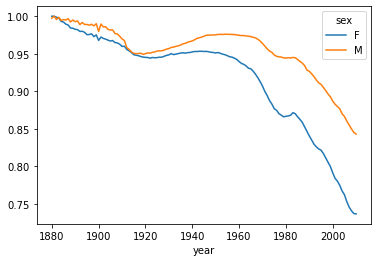

In [52]:
table.plot()

In [53]:
df = boys[boys.year == 2010]

In [54]:
df

,name,sex,birth,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102
